# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade

In [8]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and CSV I/O
import seaborn as sns  # For enhanced visualizations
import matplotlib.pyplot as plt  # For plotting
import warnings  # To manage warnings

# Suppress warnings for cleaner output (use sparingly in production)
warnings.filterwarnings('ignore')

# Set a consistent plotting style
plt.style.use('fivethirtyeight')

# Ensure plots display inline in Jupyter
%matplotlib inline

# Define the dataset path (adjust if needed for your environment)
data_path = r"C:\Users\AKINMADE FARUQ\Downloads\PROJECT MATERIALS\My Projects\GITHUB\Water Quality Classification\water_potability.csv"  # Or './water_potability.csv' if in current dir

# Load the data
data = pd.read_csv(data_path)

# Quick check: Print the shape and first few rows
print(f"Dataset loaded with {data.shape[0]} rows and {data.shape[1]} columns.")
data.head()


Dataset loaded with 3276 rows and 10 columns.


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
# Initial data inspection
print("Dataset Info:")
print(data.info())  # Display data types, non-null counts, and memory usage
print("\nBasic Statistics:")
print(data.describe())  # Summary stats for numerical columns
print("\nMissing Values:")
print(data.isnull().sum())  # Count missing values per column

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

Basic Statistics:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.8

## Dataset Description and EDA Objectives

### Dataset Overview
The dataset contains 3276 samples of water quality measurements with 10 features, including 9 physicochemical parameters and a binary `Potability` label (0 = not potable, 1 = potable). The goal is to understand factors influencing water potability, potentially for a classification task. Below are the features with their descriptions and standard ranges (where applicable, based on WHO drinking water guidelines):

- **ph**: pH level of water, measuring acidity/alkalinity (ideal range: 6.5–8.5). Extreme values (e.g., 0 or 14) suggest data issues.
- **Hardness**: Calcium and magnesium content (mg/L as CaCO₃). Typical range: 50–200 mg/L; higher values indicate hard water.
- **Solids**: Total dissolved solids (ppm). WHO suggests <1000 ppm for safe drinking; high values (e.g., >50,000 ppm) may indicate outliers.
- **Chloramines**: Chloramine levels (ppm), used for disinfection. Safe levels: <4 ppm; higher may pose health risks.
- **Sulfate**: Sulfate concentration (mg/L). WHO guideline: <250 mg/L; high levels affect taste/health.
- **Conductivity**: Electrical conductivity (μS/cm). Typical range: 200–800 μS/cm; affects water quality perception.
- **Organic_carbon**: Total organic carbon (ppm). Lower is better; high levels (>10 ppm) may indicate contamination.
- **Trihalomethanes**: Trihalomethanes (μg/L), disinfection byproducts. WHO guideline: <100 μg/L (e.g., chloroform <80 μg/L).
- **Turbidity**: Light scattering due to particles (NTU). WHO recommends <5 NTU for drinking water.
- **Potability**: Binary label (0 = not potable, 1 = potable). Mean ~0.39 suggests class imbalance (~61% non-potable).

### EDA Objectives
1. **Assess Data Quality**: Identify and handle missing values (ph: 491, Sulfate: 781, Trihalomethanes: 162) and outliers (e.g., ph=0/14, Solids=61227 ppm).
2. **Explore Distributions**: Analyze feature distributions and skewness to understand data characteristics and normalization needs.
3. **Investigate Relationships**: Examine correlations and feature interactions with Potability to identify predictive signals.
4. **Check Class Imbalance**: Confirm Potability distribution and implications for modeling.
5. **Domain Validation**: Compare feature values against WHO standards to flag anomalies and contextualize potability.

### Notes
- Missing values in `ph`, `Sulfate`, and `Trihalomethanes` require imputation or removal strategies, considering patterns (e.g., MCAR vs. MAR).
- Outliers and extreme values (e.g., ph=0) suggest data cleaning needs.
- Class imbalance may necessitate techniques like SMOTE for modeling.
- Next steps: Visualize missing values, distributions, and correlations.

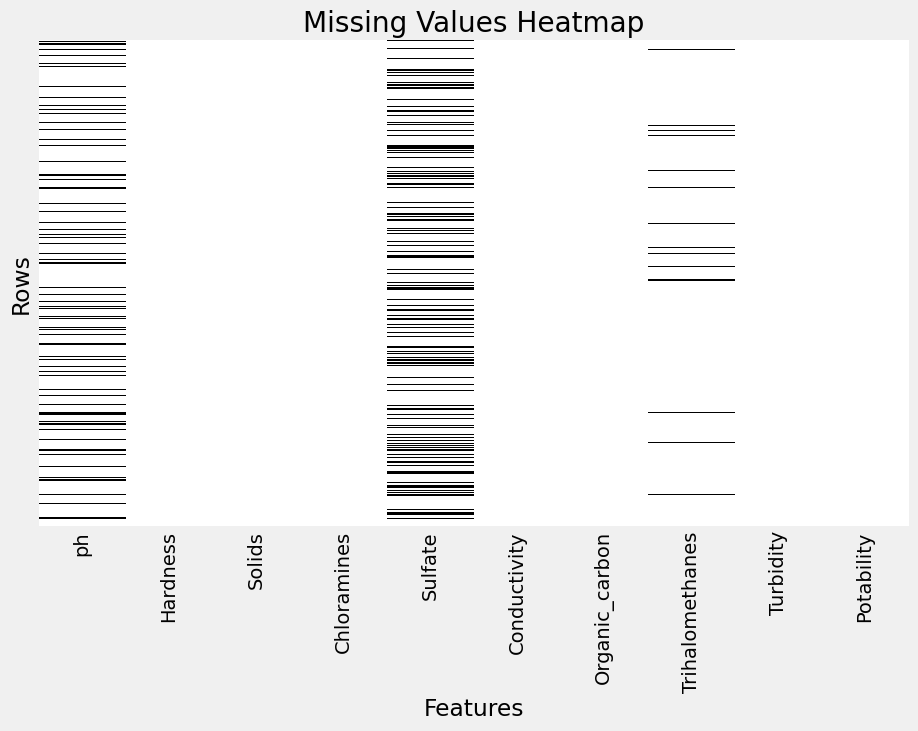

Missing Value Percentages:
ph                 14.987790
Sulfate            23.840049
Trihalomethanes     4.945055
dtype: float64


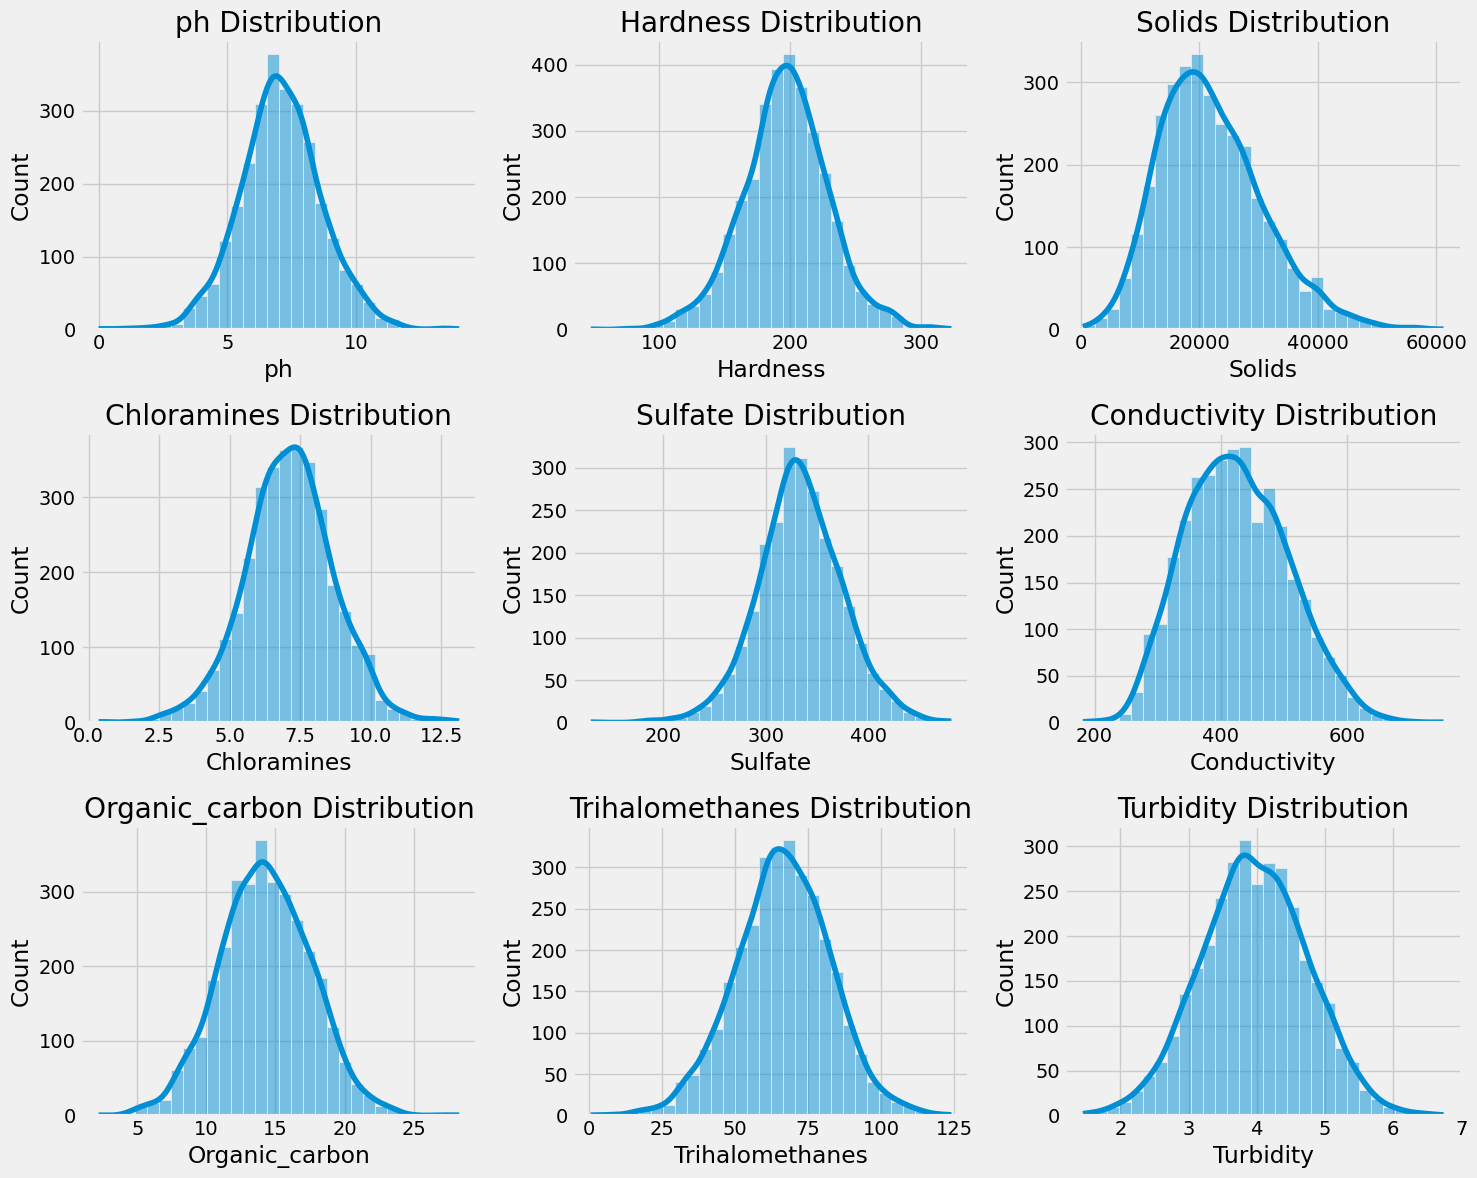


Potability Distribution:
Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


In [10]:
# Visualizing missing values and feature distributions
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='binary', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

# Print missing value percentages
print("Missing Value Percentages:")
missing_percent = data.isnull().mean() * 100
print(missing_percent[missing_percent > 0])  # Show only columns with missing values

# Histograms for feature distributions
features = data.columns.drop('Potability')  # Exclude binary target
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Check Potability distribution
print("\nPotability Distribution:")
print(data['Potability'].value_counts(normalize=True) * 100)

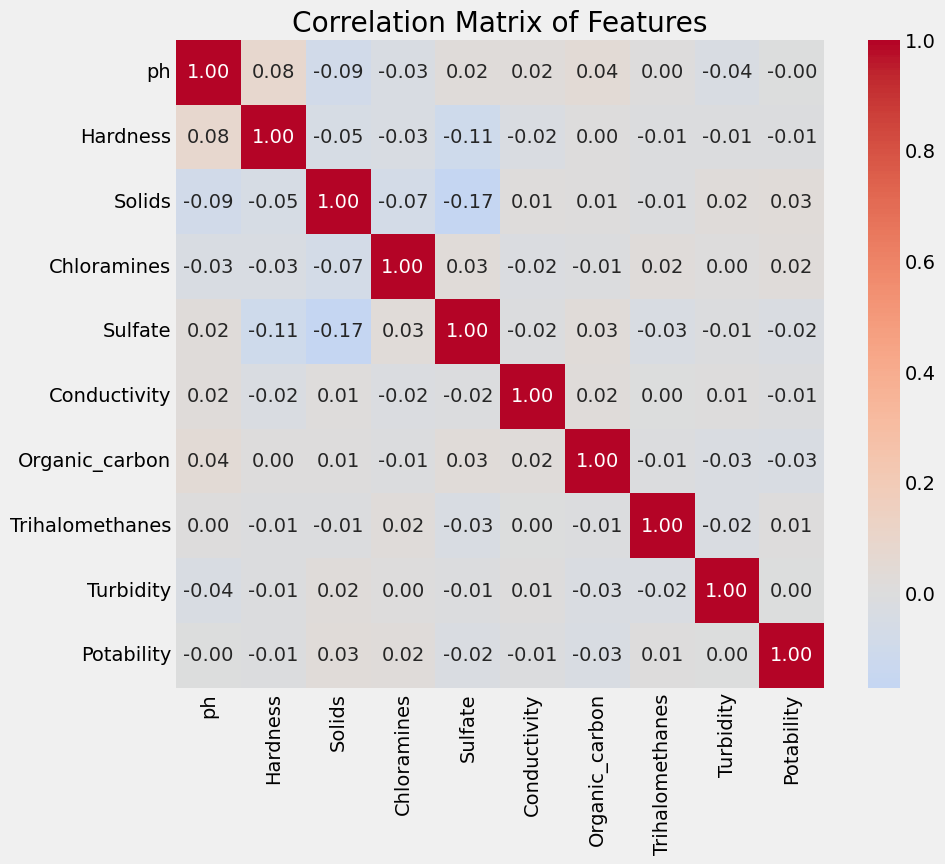

Correlations with Potability (|corr| > 0.1):
Series([], Name: Potability, dtype: float64)


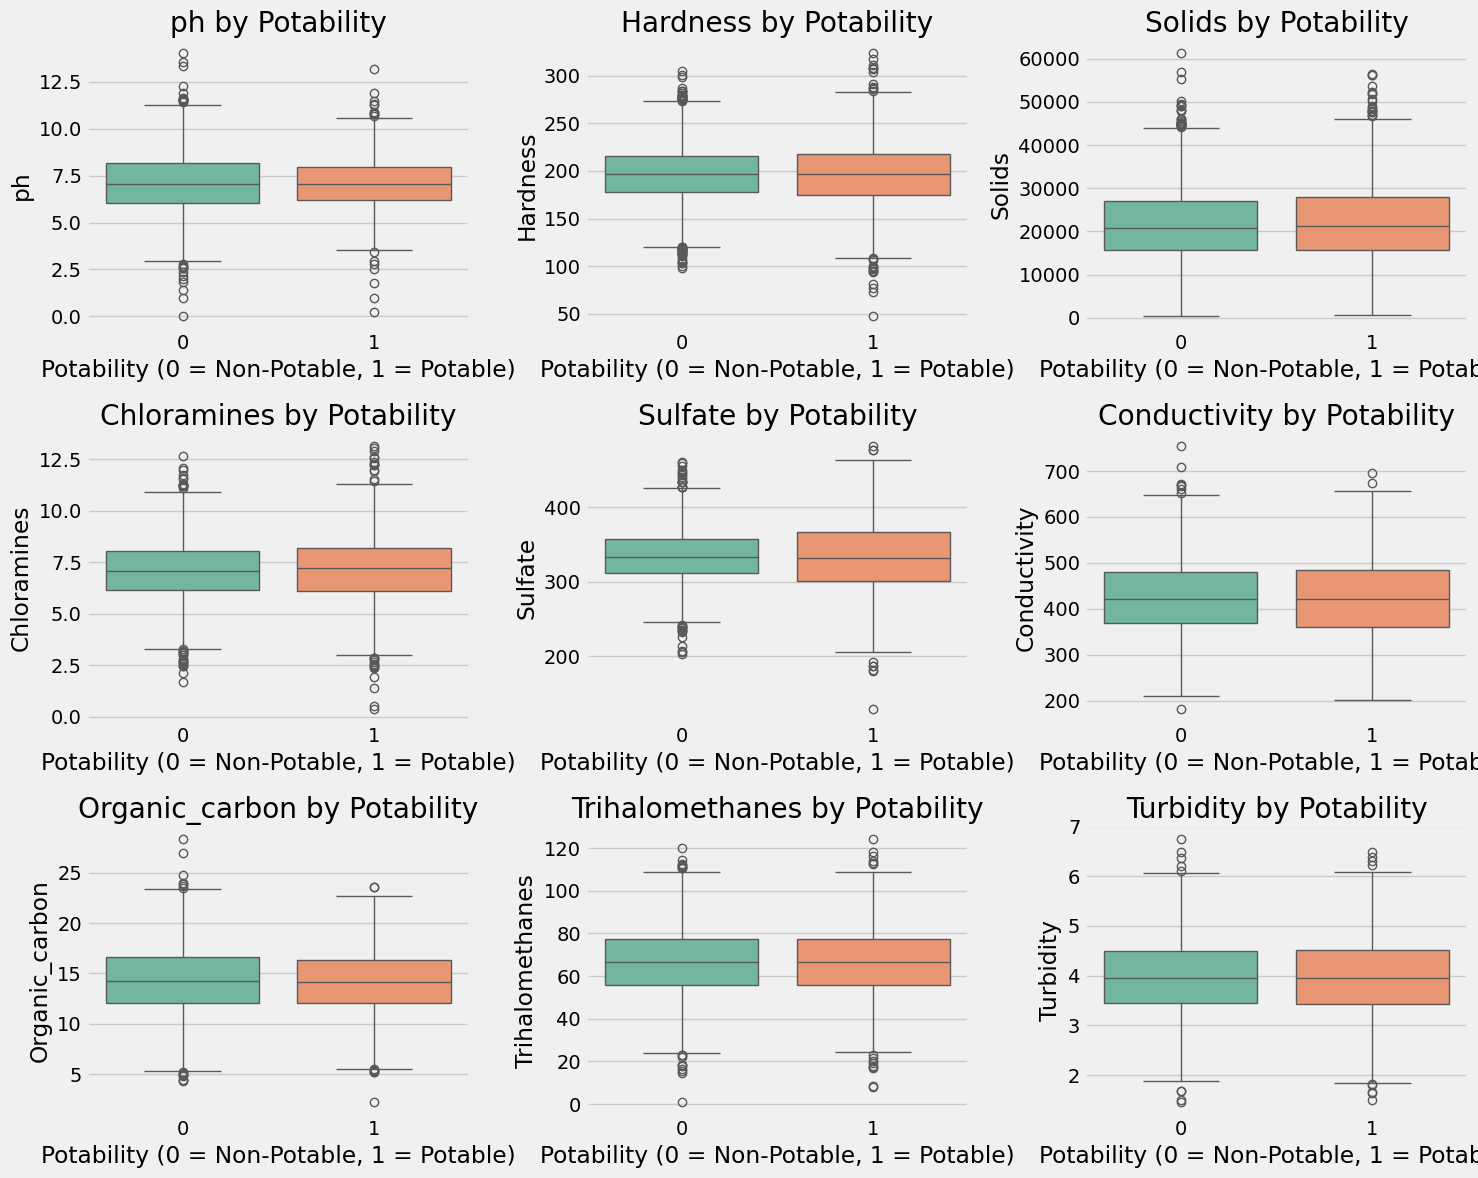

In [11]:
# Correlation analysis and feature relationships with Potability
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix of Features')
plt.show()

# Print notable correlations with Potability
print("Correlations with Potability (|corr| > 0.1):")
potability_corr = corr_matrix['Potability'].drop('Potability').sort_values(ascending=False)
print(potability_corr[abs(potability_corr) > 0.1])

# Boxplots: Feature distributions by Potability
features = data.columns.drop('Potability')
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Potability', y=feature, data=data, palette='Set2')
    plt.title(f'{feature} by Potability')
    plt.xlabel('Potability (0 = Non-Potable, 1 = Potable)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [15]:
# Data cleaning: Handle missing values and outliers
import pandas as pd
from scipy import stats

# Missing value imputation (using median for robustness against outliers)
for column in ['ph', 'Sulfate', 'Trihalomethanes']:
    data[column].fillna(data[column].median(), inplace=True)

# Outlier detection and capping using IQR (only on numeric columns)
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.drop('Potability')
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower_bound, upper_bound)

# Verify cleaning
print("Missing Values After Imputation:")
print(data.isnull().sum())
print("\nSummary Stats After Cleaning:")
print(data.describe())

# Optional: Flag extreme values against WHO standards
who_limits = {
    'ph': (6.5, 8.5),         # Lower and upper bounds
    'Solids': (None, 1000),    # Upper bound only
    'Chloramines': (None, 4),  # Upper bound only
    'Sulfate': (None, 250),    # Upper bound only
    'Turbidity': (None, 5)     # Upper bound only
}
for feature, (lower, upper) in who_limits.items():
    if lower is not None and upper is not None:
        data[f'{feature}_out_of_range'] = (data[feature] < lower) | (data[feature] > upper)
    elif upper is not None:
        data[f'{feature}_out_of_range'] = data[feature] > upper
print("\nPercentage of Samples Out of WHO Range:")
print(data[[f'{feature}_out_of_range' for feature in who_limits]].mean() * 100)

Missing Values After Imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
ph_out_of_range    0
dtype: int64

Summary Stats After Cleaning:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.073348   196.392423  21957.112200     7.121794   333.621265   
std       1.382036    32.017189   8592.820397     1.544126    31.769482   
min       3.889107   117.125160    320.942611     3.146221   267.157960   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      10.258615   276.392834  44831.869873    11.096086   400.322434   

       Conductiv

Rows retained after filtering: 0
Percentage of original data retained: 0.00%

Correlation with Potability after Cleaning:
ph                NaN
Hardness          NaN
Solids            NaN
Chloramines       NaN
Sulfate           NaN
Conductivity      NaN
Organic_carbon    NaN
Trihalomethanes   NaN
Turbidity         NaN
Name: Potability, dtype: float64


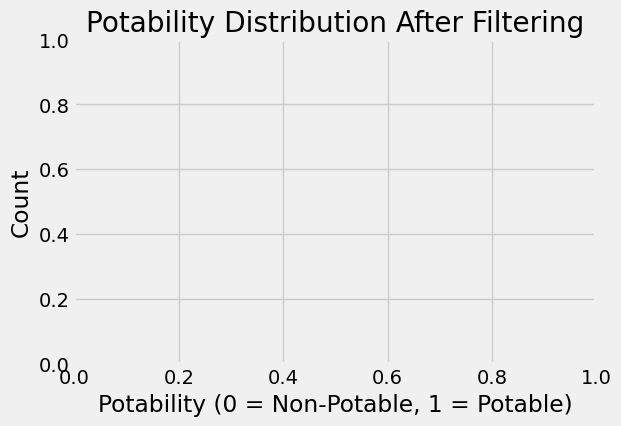

In [16]:
# Filter extreme cases and re-evaluate
import pandas as pd

# Count number of out-of-range features per row
out_of_range_count = data[[f'{f}_out_of_range' for f in {'ph', 'Solids', 'Chloramines', 'Sulfate', 'Turbidity'}]].sum(axis=1)

# Filter rows where <= 1 feature is out of range
data_cleaned = data[out_of_range_count <= 1].copy()

# Drop temporary boolean columns
data_cleaned = data_cleaned.drop(columns=[col for col in data_cleaned.columns if col.endswith('_out_of_range')])

# Recompute correlation with Potability
correlation_with_potability = data_cleaned.corr()['Potability'].drop('Potability').sort_values(ascending=False)

print(f"Rows retained after filtering: {data_cleaned.shape[0]}")
print(f"Percentage of original data retained: {(data_cleaned.shape[0] / 3276) * 100:.2f}%")
print("\nCorrelation with Potability after Cleaning:")
print(correlation_with_potability)

# Optional: Visualize Potability distribution post-filtering
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=data_cleaned)
plt.title('Potability Distribution After Filtering')
plt.xlabel('Potability (0 = Non-Potable, 1 = Potable)')
plt.ylabel('Count')
plt.show()

Rows retained after filtering: 37
Percentage of original data retained: 1.13%

Correlation with Potability after Revised Filtering:
Solids             0.310085
Trihalomethanes    0.092910
Organic_carbon    -0.047686
Hardness          -0.091345
ph                -0.101325
Turbidity         -0.142695
Sulfate           -0.180740
Conductivity      -0.235436
Chloramines       -0.599344
Name: Potability, dtype: float64


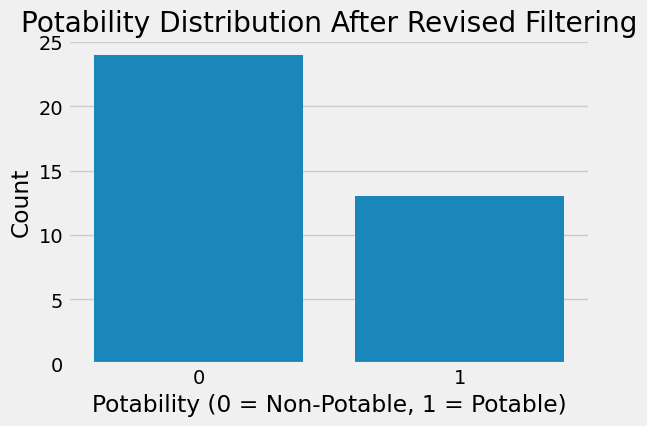


Summary Stats After Revised Filtering:
              ph    Hardness        Solids  Chloramines     Sulfate  \
count  37.000000   37.000000     37.000000    37.000000   37.000000   
mean    7.264125  198.670385  22811.339374     3.541808  318.704612   
std     0.494908   35.116992  10583.478796     0.349160   34.976078   
min     6.548797  137.253427    320.942611     3.146221  267.157960   
25%     7.036752  160.224182  15658.086280     3.146221  294.603038   
50%     7.036752  201.833720  20593.933718     3.615891  325.061246   
75%     7.496991  227.432663  31085.083433     3.777648  333.073546   
max     8.419971  263.036704  44831.869873     4.598670  393.684587   

       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
count     37.000000       37.000000        37.000000  37.000000   37.000000  
mean     419.088607       14.112923        66.596242   3.695827    0.351351  
std       79.712972        3.384522        11.901987   0.583843    0.483978  
min     

In [17]:
# Revise filtering strategy and re-evaluate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust filtering threshold to allow up to 2 violations
out_of_range_count = data[[f'{f}_out_of_range' for f in {'ph', 'Solids', 'Chloramines', 'Sulfate', 'Turbidity'}]].sum(axis=1)
data_filtered = data[out_of_range_count <= 2].copy()

# Drop temporary boolean columns
data_filtered = data_filtered.drop(columns=[col for col in data_filtered.columns if col.endswith('_out_of_range')])

# Check if any data remains
if data_filtered.empty:
    print("Warning: No data retained after filtering. Consider relaxing the threshold further or adjusting WHO limits.")
else:
    print(f"Rows retained after filtering: {data_filtered.shape[0]}")
    print(f"Percentage of original data retained: {(data_filtered.shape[0] / 3276) * 100:.2f}%")

    # Recompute correlation with Potability
    correlation_with_potability = data_filtered.corr()['Potability'].drop('Potability').sort_values(ascending=False)
    print("\nCorrelation with Potability after Revised Filtering:")
    print(correlation_with_potability)

    # Visualize Potability distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Potability', data=data_filtered)
    plt.title('Potability Distribution After Revised Filtering')
    plt.xlabel('Potability (0 = Non-Potable, 1 = Potable)')
    plt.ylabel('Count')
    plt.show()

    # Optional: Summary stats of filtered data
    print("\nSummary Stats After Revised Filtering:")
    print(data_filtered.describe())

In [18]:
# Feature engineering and initial modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Feature engineering: Interaction terms based on correlations
data_filtered['chloramines_solids_interaction'] = data_filtered['Chloramines'] * data_filtered['Solids']
data_filtered['conductivity_sulfate_interaction'] = data_filtered['Conductivity'] * data_filtered['Sulfate']

# Prepare features and target
X = data_filtered.drop('Potability', axis=1)
y = data_filtered['Potability']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("\nFeature Importance (Coefficients):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

Accuracy on test set: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       1.00      0.20      0.33         5

    accuracy                           0.50         8
   macro avg       0.71      0.60      0.47         8
weighted avg       0.79      0.50      0.43         8


Feature Importance (Coefficients):
                             Feature  Coefficient
7                    Trihalomethanes     0.147750
4                            Sulfate     0.071703
5                       Conductivity     0.051538
2                             Solids     0.003473
10  conductivity_sulfate_interaction    -0.000344
9     chloramines_solids_interaction    -0.000896
1                           Hardness    -0.001593
3                        Chloramines    -0.038158
8                          Turbidity    -0.060895
0                                 ph    -0.468804
6                     Organic_carbon

In [19]:
# Cross-validation with SMOTE to handle imbalance
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Prepare features and target
X = data_filtered.drop('Potability', axis=1)
y = data_filtered['Potability']

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Set up stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(model, X_res, y_res, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Train on full resampled data and evaluate
model.fit(X_res, y_res)
y_pred = model.predict(X)
print("\nClassification Report on Original Filtered Data:")
print(classification_report(y, y_pred))

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("\nFeature Importance (Coefficients):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

Cross-validation scores: [0.7        0.9        1.         0.77777778 0.55555556]
Mean CV accuracy: 0.79 (+/- 0.31)

Classification Report on Original Filtered Data:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.80      0.92      0.86        13

    accuracy                           0.89        37
   macro avg       0.88      0.90      0.89        37
weighted avg       0.90      0.89      0.89        37


Feature Importance (Coefficients):
                             Feature  Coefficient
7                    Trihalomethanes     0.239049
4                            Sulfate     0.018838
2                             Solids     0.002795
10  conductivity_sulfate_interaction    -0.000067
9     chloramines_solids_interaction    -0.000728
1                           Hardness    -0.006550
5                       Conductivity    -0.008215
8                          Turbidity    -0.043652
3                    

In [21]:
# Enhanced modeling with Random Forest and hyperparameter tuning
# Enhanced modeling with Random Forest and hyperparameter tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Prepare features and target
X = data_filtered.drop('Potability', axis=1)
y = data_filtered['Potability']

# Apply SMOTE to balance classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Set up stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest and GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_res, y_res)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Train on full resampled data with best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
print("\nClassification Report on Original Filtered Data:")
print(classification_report(y, y_pred))

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
print("\nFeature Importance (Random Forest):")
print(feature_importance.sort_values(by='Importance', ascending=False))

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.79

Classification Report on Original Filtered Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        13

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37


Feature Importance (Random Forest):
                             Feature  Importance
3                        Chloramines    0.307106
8                          Turbidity    0.113631
2                             Solids    0.103885
5                       Conductivity    0.094811
10  conductivity_sulfate_interaction    0.074931
9     chloramines_solids_interaction    0.073886
7                    Trihalomethanes    0.053249
1                           Hardness    0.051708
4     

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

# 1. Split data into train/test (if not already done)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

# 2. Train the best Random Forest model on the training set
best_model.fit(X_train, y_train)

# 3. Predict on test set
y_test_pred = best_model.predict(X_test)

# 4. Evaluate
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

# 5. Save the trained model
joblib.dump(best_model, 'water_potability_model.pkl')
print("\nModel saved as 'water_potability_model.pkl'")



Confusion Matrix:
[[5 0]
 [1 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

Test Set Accuracy: 0.90

Model saved as 'water_potability_model.pkl'


In [26]:
import joblib

# Load the saved pipeline
pipeline = joblib.load('water_potability_model.pkl')
print("model loaded successfully.")


model loaded successfully.


# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade
